# Logistic regression

In [14]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [42]:
data = pd.read_csv('pima-indians-diabetes.data.txt')
data.columns = ["Number of times pregnant", "Plasma glucose concentration", "Diastolic blood pressure", 
                "Triceps skin fold thickness", "2-Hour serum insulin", "Body mass index", "Diabetes pedigree function",
                "Age (years)", "Class variable (0 or 1)"]


In [43]:
data

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


## Data Visualisation

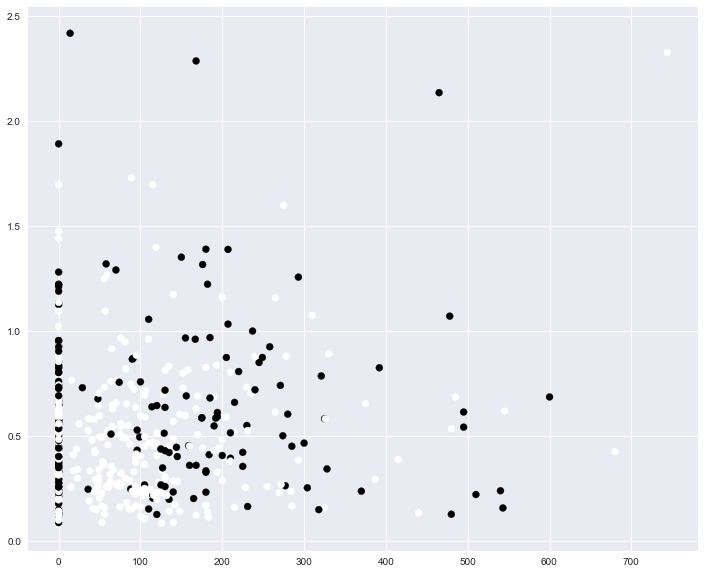

In [73]:
plt.figure(figsize=(12, 10))
plt.scatter(X[:, 4], X[:, -2], c = Y)

In [51]:
# split into train and test dataset
ratio = 0.8
train = int(len(data) * ratio)
test = len(data) - train
indexes = np.zeros(data.shape[0])
indexes[np.random.choice(len(data), train, replace=False)] = 1

X = np.array(data[indexes == 1].values)[:,:-1]
Y = np.array(data[indexes == 1].values)[:,-1]
test_x = np.array(data[indexes == 0].values)[:,:-1]
test_y = np.array(data[indexes == 0].values)[:,-1]

## Sigmoid Function

In [37]:
def sigmoid(x):
    '''1 / (1 + e^(-x))'''
    return 1/(1 + np.exp(-x))

## Log-Likelihood

In [38]:
def log_likelihood(features, target, weights):
    '''
        U = sum(target * weights_tr * features - log(1 + exp(weights_tr * features)))
        U = sum(target * z - log(1 + exp(weights_tr * features)))
    '''
    scores = np.dot(features, weights) 
    
    return np.sum(target * scores - np.log(1 + np.exp(scores)))

## Gradient of the Log-likelihood

In [39]:
def grad(features, target, predictions):
    '''
        grad(U) = features_tr * (target - predictions)
    '''
    diff = target - predictions
    return np.dot(features.T, diff)

## Logistic regression

In [55]:
def logistic_regression(features, target, num_steps, learning_rate):
    # initialize weights
    features = np.hstack((np.ones((X.shape[0], 1)), X))
    weights = np.zeros(features.shape[1])
    
    # iterative process
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        gradient = grad(features, target, predictions)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 100 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [75]:
weights = logistic_regression(X, Y, num_steps = 10000, learning_rate = 0.00001)

-4125.47076884
-15372.6856904
-17522.8863104
-5939.82446174
-16265.447657
-15857.8196882
-17204.5633362
-11995.6267567
-15318.1271412
-4407.49631203
-7703.02484579
-8245.57464442
-1685.96730024
-17667.0372601
-14115.647294
-1752.78466203
-1500.34219862
-5594.96805392
-2787.09378525
-12783.8390988
-2357.30189416
-1582.32567543
-2259.38173894
-2791.76902078
-1727.44810338
-1604.15668993
-16917.5458939
-4740.48337779
-1870.36892734
-16904.4289857
-14560.8831565
-15522.9085734
-2997.92374436
-1717.88626698
-10693.2520962
-1768.45616471
-8624.78657424
-9046.77739627
-8283.44020813
-16229.1165233
-5534.56117038
-3009.65089773
-2005.36127644
-16989.6475244
-14297.6614735
-13657.7281034
-1752.9842329
-2311.02575538
-6812.51728334
-3632.51639918
-16866.2763435
-2033.23814731
-4904.65290529
-14069.8207143
-5412.06703428
-7259.91219555
-4353.0109565
-7060.23887048
-3737.99475181
-6947.68412499
-4023.4513159
-6916.11332712
-4155.95069456
-6859.11040822
-4279.48819552
-6799.18634055
-4386.1456023
-

## Accuracy

In [86]:
data_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == Y).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.6557911908646004


## Check results on data

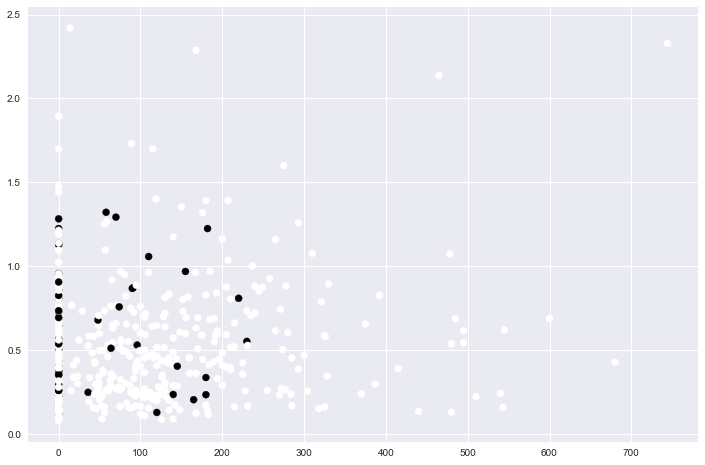

In [80]:
data_with_intercept = np.hstack((np.ones((X.shape[0], 1)),
                                 X))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

plt.figure(figsize = (12, 8))
plt.scatter(X[:, 4], X[:, -2],
            c = preds == Y - 1, s = 50)

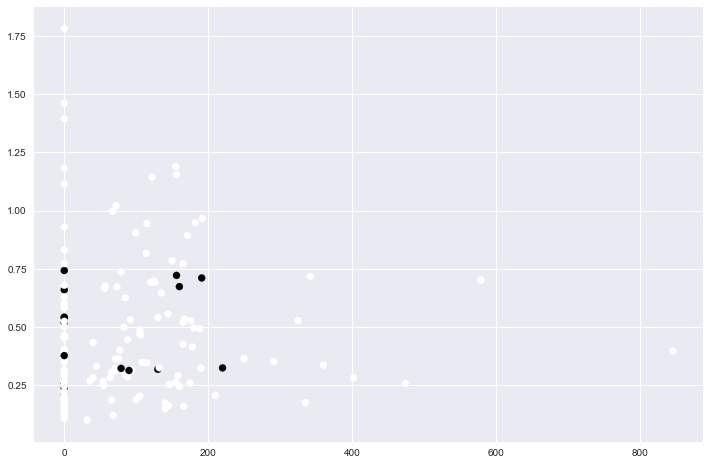

In [81]:
data_with_intercept = np.hstack((np.ones((test_x.shape[0], 1)), test_x))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

plt.figure(figsize = (12, 8))
plt.scatter(test_x[:, 4], test_x[:, -2],
            c = preds == test_y - 1, s = 50)